# Results R1b: What sentiment, topic and social networks are evident in the texts?

## Multilevel (i.e., random effects) models clustering on docauthorid

## Resources

In [20]:
# Get Packages & Libraries
library(tidyverse)
library(brms)

In [21]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [10]:
# View Data
df1  <- read.csv("20240611_PhD_FinalData-Ltr.csv")
df1[df1 == ''] <- NA #replace blank cells with NA
df1 <- df1[-c(1:2)] #drop the index columns
df1 <- factorize(df1)
glimpse(df1)

Rows: 676
Columns: 33
$ docid            <fct> 20910, 21062, 21324, 21334, 21354, 21470, 21549, 2156…
$ docyear          <int> 1891, 1871, 1892, 1891, 1890, 1800, 1839, 1838, 1844,…
$ docmonth         <dbl> 7, 11, 5, 10, 2, 3, 1, 9, 12, 4, 10, 1, 5, 6, 10, 10,…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, Isabella Weir Moore…
$ docauthorid      <fct> IED0107, IED0179, IED0107, IED0621, IED0958, IED0099,…
$ authorLocation   <fct> USA, Canada, USA, USA, USA, USA, USA, USA, USA, USA, …
$ authorGender     <fct> F, F, F, F, M, F, F, F, F, F, F, F, F, M, M, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, False, NA, NA, NA, NA, NA, NA, NA, False,…
$ catholic         <fct> NA, NA, NA, False, NA, NA, NA, NA, NA, NA, NA, False,…
$ otherChristian  

In [11]:
# Get Data
# View Data
df2  <- read.csv("20240611_PhD_FinalData-LtrChk.csv")
df2[df2 == ''] <- NA #replace blank cells with NA
df2 <- df2[-c(1:2)] #drop the index columns
df2 <- factorize(df2)
glimpse(df2)

Rows: 2,392
Columns: 36
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <int> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <dbl> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic         <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ otherChristian

In [12]:
# Get counts for topic number
table(as.factor(df1$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df1$topicLabel <- as.character(df1$topicNumber)
df1$topicLabel[df1$topicLabel=="0"]  <- "01 Correspondence"
df1$topicLabel[df1$topicLabel=="1"]  <- "02 Money and Government"
df1$topicLabel[df1$topicLabel=="2"]  <- "03 People"
df1$topicLabel[df1$topicLabel=="3"]  <- "04 Contemplation"
df1$topicLabel[df1$topicLabel=="4"]  <- "05 Setting"
df1$topicLabel[df1$topicLabel=="5"]  <- "06 Farming"
df1$topicLabel[df1$topicLabel=="6"]  <- "07 Routines"
df1$topicLabel[df1$topicLabel=="7"]  <- "08 Family Life"
df1$topicLabel <- as.factor(df1$topicLabel)

# Check
df1 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df1$topicLabel)
sum(is.na(df1$topicLabel))


  0   1   2   3   4   5   6   7 
 68  56 117  71  50  96  50 168 

topicNumber,topicLabel
<int>,<fct>
0,01 Correspondence
1,02 Money and Government
2,03 People
3,04 Contemplation
4,05 Setting
5,06 Farming
6,07 Routines
7,08 Family Life



      01 Correspondence 02 Money and Government               03 People 
                     68                      56                     117 
       04 Contemplation              05 Setting              06 Farming 
                     71                      50                      96 
            07 Routines          08 Family Life 
                     50                     168 

[1] 0

In [13]:
# Get counts for topic number
table(as.factor(df2$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df2$topicLabel <- as.character(df2$topicNumber)
df2$topicLabel[df2$topicLabel=="0"]  <- "01 Weather"
df2$topicLabel[df2$topicLabel=="1"]  <- "02 Money"
df2$topicLabel[df2$topicLabel=="2"]  <- "03 Farming"
df2$topicLabel[df2$topicLabel=="3"]  <- "04 Correspondence"
df2$topicLabel[df2$topicLabel=="4"]  <- "05 People"
df2$topicLabel[df2$topicLabel=="5"]  <- "06 Setting"
df2$topicLabel[df2$topicLabel=="6"]  <- "07 Contemplation"
df2$topicLabel[df2$topicLabel=="7"]  <- "08 Family Life"
df2$topicLabel[df2$topicLabel=="8"]  <- "09 Travel"
df2$topicLabel[df2$topicLabel=="9"]  <- "10 Difficulty"
df2$topicLabel[df2$topicLabel=="10"]  <- "11 Government"
df2$topicLabel <- as.factor(df2$topicLabel)

# Check
df2 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df2$topicLabel)
sum(is.na(df2$topicLabel))


  0   1   2   3   4   5   6   7   8   9  10 
173 159 227 299 266 182 171 292 147 262 214 

topicNumber,topicLabel
<int>,<fct>
0,01 Weather
1,02 Money
2,03 Farming
3,04 Correspondence
4,05 People
5,06 Setting
6,07 Contemplation
7,08 Family Life
8,09 Travel



       01 Weather          02 Money        03 Farming 04 Correspondence 
              173               159               227               299 
        05 People        06 Setting  07 Contemplation    08 Family Life 
              266               182               171               292 
        09 Travel     10 Difficulty     11 Government 
              147               262               214 

[1] 0

In [14]:
#Socials Variable Prep
df1$indsRate <- df1$indsTot/df1$uniqueTokens
df1$fppAllRate <- df1$fppAll_Ct/df1$totalTokens
df2$mentsRate <- df2$mentsTot/df2$totalTokens
df2$fppAllRate <- df2$fppAll_Ct/df2$totalTokens

## Sentiment

$$sentimentLetter_{ik} \sim Norm(\mu_{ik}, \sigma)$$
$$\mu_{ik} = \alpha_k$$
$$\alpha_k \sim Norm(\gamma, \eta)$$
$$\sigma \sim Unif(0, 10)$$
$$\gamma \sim Norm(0, 3)$$
$$\eta \sim Unif(0, 10)$$

### First letters

In [92]:
# Used this to verify that brm giving the same result as quap for single level model. All good.
f1s <- brm(data=df1,
           family=gaussian,
           scoreCom ~ 1,
           prior=c(prior("normal(0,3)",class=Intercept),
                   prior("uniform(0,10)",class=sigma, ub = 10)),
           iter=2000,warmup = 1000,chains=4,cores=4, 
           seed = 4,
           file = "20240615_PhD_LtrSen_01")

print(f1s)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.16      0.01     0.14     0.18 1.00     3318     2509

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.01     0.26     0.29 1.00     2480     1904

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [83]:
f1m <- brm(
    formula= scoreCom ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240615_PhD_LtrSen_02"
)

print(f1m)

Compiling Stan program...

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Start sampling

Found more than one c

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.17      0.02     0.13     0.21 1.00     1177     2331

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.19      0.02     0.16     0.23 1.00     2453     2597

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.23      0.01     0.22     0.25 1.00     4050     2819

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at converg

In [93]:
f1s <- add_criterion(f1s, "waic")
f1m <- add_criterion(f1m, "waic")

w <- loo_compare(f1s, f1m, criterion = "waic")

print(w, simplify = F)

Warning message:
“
58 (8.6%) p_waic estimates greater than 0.4. We recommend trying loo instead.”
Automatically saving the model object in '20240615_PhD_LtrSen_02.rds'



    elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic  se_waic
f1m   0.0       0.0   -31.8      39.0         92.2   10.9      63.6  77.9  
f1s -51.2      20.3   -83.0      30.8          3.8    0.5     166.0  61.6  


The WAIC is considerably better (i.e., lower) for the multilevel model (f1m).

In [126]:
post <- as_draws_df(f1m)

posterior_summary(f1m)[0:3,]

post_mdn <- 
  coef(f1m, robust = T)$docauthorid[, , ] %>% 
  data.frame()

head(post_mdn)

,Estimate,Est.Error,Q2.5,Q97.5
b_Intercept,0.1947349,0.018712174,0.1565145,0.2316677
sd_docauthorid__Intercept,0.1665322,0.020229075,0.1286349,0.2073524
sigma,0.2345094,0.007512457,0.2201971,0.2495384


,Estimate,Est.Error,Q2.5,Q97.5
,<dbl>,<dbl>,<dbl>,<dbl>
IED0028,0.16406150,0.13606378,-0.108588519,0.4230389
IED0030,0.15272587,0.07893032,-0.003062658,0.3074138
IED0032,0.45038333,0.13497092,0.185673420,0.7274041
IED0037,0.09820304,0.07350133,-0.041752782,0.2393131
IED0068,0.36015401,0.11934836,0.134753040,0.5992923
IED0069,0.43909813,0.13875960,0.172833016,0.7228534


In [173]:
dim(post)

[1] 4000  183

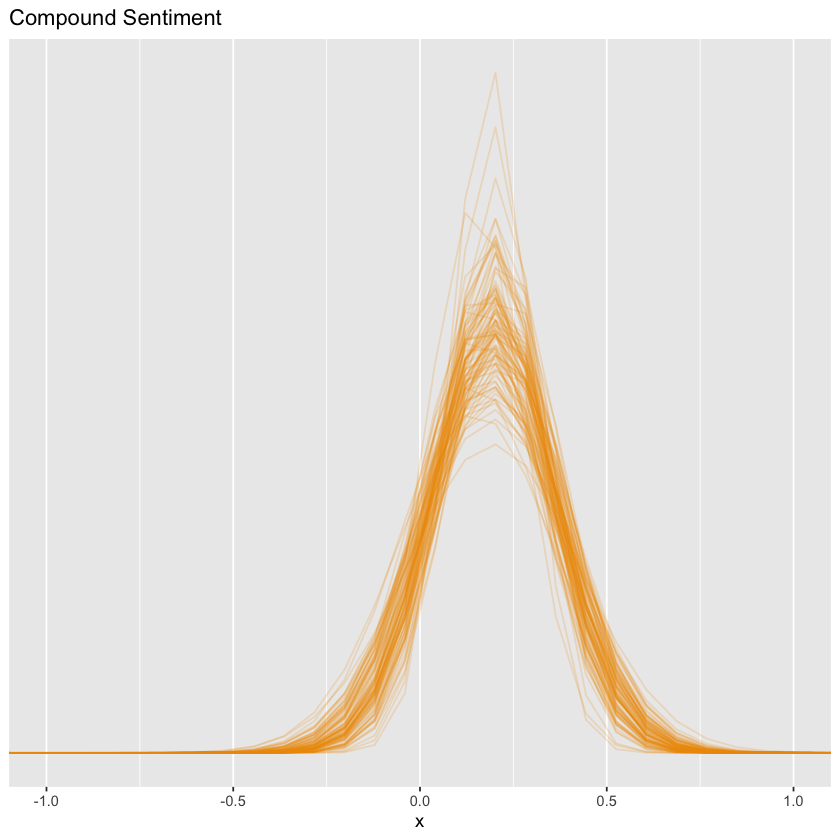

In [170]:
#p1 <-
  post %>% 
  slice_sample(n = 100) %>% 
  expand_grid(x = seq(from = -4, to = 4, length.out = 100)) %>%
  mutate(density = dnorm(x, mean = b_Intercept, sd = sd_docauthorid__Intercept)) %>%     
  ggplot(aes(x = x, y = density, group = .draw)) +
  geom_line(alpha = .2, color = "orange2") +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(title = "Compound Sentiment") +
  coord_cartesian(xlim = c(-1, 1))

### Now clusters

In [175]:
f2m <- brm(
    formula= scoreCom ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240616_PhD_LtrChkSen_02"
)

print(f2m)

Compiling Stan program...

Loading required package: rethinking

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:stats’:

    rstudent


Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namesp

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.14      0.01     0.11     0.17 1.00      911     1717

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.17      0.01     0.15     0.20 1.00     1472     2241

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.00     0.26     0.28 1.00     5859     2929

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at conver

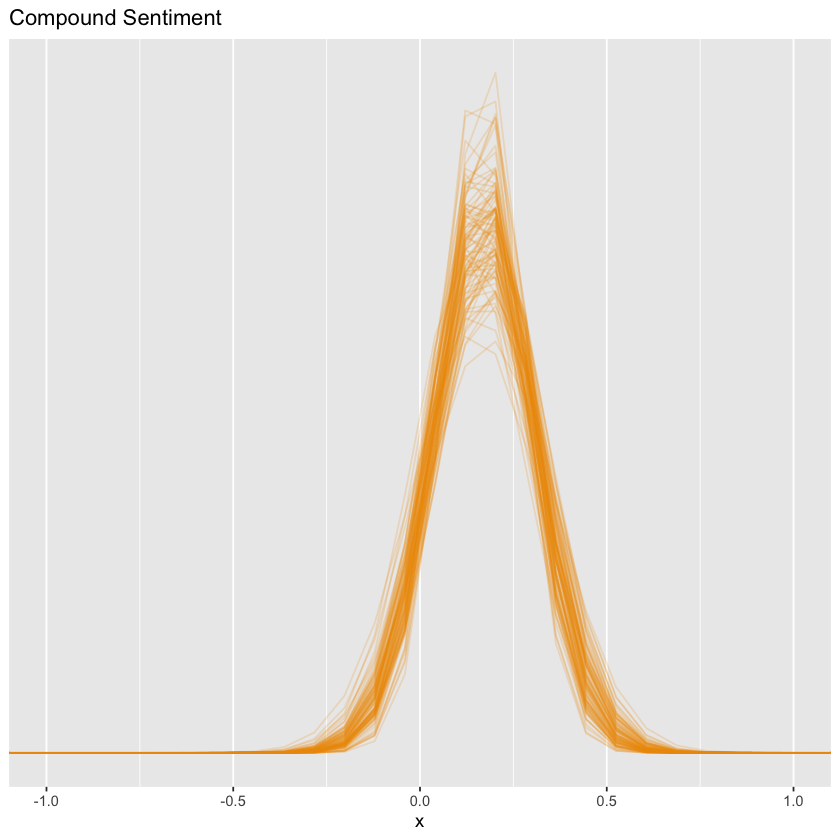

In [316]:
post <- as_draws_df(f2m)
post %>% 
  slice_sample(n = 100) %>% 
  expand_grid(x = seq(from = -4, to = 4, length.out = 100)) %>%
  mutate(density = dnorm(x, mean = b_Intercept, sd = sd_docauthorid__Intercept)) %>%     
  ggplot(aes(x = x, y = density, group = .draw)) +
  geom_line(alpha = .2, color = "orange2") +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(title = "Compound Sentiment") +
  coord_cartesian(xlim = c(-1, 1))

## Topics

$$letterTopics_i \sim Cat(softmax(topic_{1i}, topic_{2i}, ... , topic_{ki})$$
$$topic_{1i} = 0$$
$$topic_{2i}, ... ,topic_{ki} = \alpha_{topic_2}, ... ,\alpha_{topic_k} $$
$$\alpha_{topic_2}, ... , \alpha_{topic_k} \sim Norm(0,2)$$

### First, for letters

In [364]:
# First verifying that the single level model in brms produces the same result as quap in the rethinking pkg.
get_prior(data = df1, 
          family = categorical(link = logit, refcat = "01 Correspondence"),
          topicLabel ~ 1)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,mu02MoneyandGovernment,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu03People,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu04Contemplation,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu05Setting,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu06Farming,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu07Routines,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu08FamilyLife,,,,default


In [365]:
f3s <- brm(data = df1, 
      family = categorical(link = logit, refcat = "01 Correspondence"),
      topicLabel ~ 1,
      prior = c(prior(normal(0, 2), class = Intercept, dpar = mu02MoneyandGovernment),
                prior(normal(0, 2), class = Intercept, dpar = mu03People),
                prior(normal(0, 2), class = Intercept, dpar = mu04Contemplation),
                prior(normal(0, 2), class = Intercept, dpar = mu05Setting),
                prior(normal(0, 2), class = Intercept, dpar = mu06Farming),
                prior(normal(0, 2), class = Intercept, dpar = mu07Routines),
                prior(normal(0, 2), class = Intercept, dpar = mu08FamilyLife)),
      iter = 2000, warmup = 1000, cores = 4, chains = 4, seed=4,
          file = "20240626_PhD_LtrTop_01")


Compiling Stan program...

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Start sampling

Found more than one c

In [368]:
print(f3s)

 Family: categorical 
  Links: mu02MoneyandGovernment = logit; mu03People = logit; mu04Contemplation = logit; mu05Setting = logit; mu06Farming = logit; mu07Routines = logit; mu08FamilyLife = logit 
Formula: topicLabel ~ 1 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
                                 Estimate Est.Error l-95% CI u-95% CI Rhat
mu02MoneyandGovernment_Intercept    -0.20      0.18    -0.57     0.15 1.01
mu03People_Intercept                 0.54      0.15     0.24     0.83 1.00
mu04Contemplation_Intercept          0.04      0.17    -0.29     0.37 1.00
mu05Setting_Intercept               -0.32      0.19    -0.69     0.05 1.00
mu06Farming_Intercept                0.34      0.16     0.04     0.65 1.01
mu07Routines_Intercept              -0.31      0.18    -0.68     0.03 1.00
mu08FamilyLife_Intercept             0.90      0.14     0.62     1.19 1.01


In [371]:
#fitted(f3s) %>% str()
fitted(f3s)[1, , ] %>% 
  round(digits = 2)

,P(Y = 01 Correspondence),P(Y = 02 Money and Government),P(Y = 03 People),P(Y = 04 Contemplation),P(Y = 05 Setting),P(Y = 06 Farming),P(Y = 07 Routines),P(Y = 08 Family Life)
Estimate,0.10,0.08,0.17,0.11,0.07,0.14,0.07,0.25
Est.Error,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02
Q2.5,0.08,0.06,0.15,0.08,0.06,0.12,0.06,0.22
Q97.5,0.12,0.11,0.20,0.13,0.10,0.17,0.09,0.28


These are the same as in the rethinking model. Moving on now to the multilevel model.

In [372]:
get_prior(data = df1, 
          family = categorical(link = logit, refcat = "01 Correspondence"),
          topicLabel ~ 1 + (1 | docauthorid))

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,mu02MoneyandGovernment,,,,default
"student_t(3, 0, 2.5)",sd,,,,mu02MoneyandGovernment,,0,,default
,sd,,docauthorid,,mu02MoneyandGovernment,,,,default
,sd,Intercept,docauthorid,,mu02MoneyandGovernment,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu03People,,,,default
"student_t(3, 0, 2.5)",sd,,,,mu03People,,0,,default
,sd,,docauthorid,,mu03People,,,,default
,sd,Intercept,docauthorid,,mu03People,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu04Contemplation,,,,default


In [373]:
f3m <- brm(data = df1, 
      family = categorical(link = logit, refcat = "01 Correspondence"),
      topicLabel ~ 1 + (1 | docauthorid),
      prior = c(prior(normal(0, 2), class = Intercept, dpar = mu02MoneyandGovernment),
                prior(normal(0, 2), class = Intercept, dpar = mu03People),
                prior(normal(0, 2), class = Intercept, dpar = mu04Contemplation),
                prior(normal(0, 2), class = Intercept, dpar = mu05Setting),
                prior(normal(0, 2), class = Intercept, dpar = mu06Farming),
                prior(normal(0, 2), class = Intercept, dpar = mu07Routines),
                prior(normal(0, 2), class = Intercept, dpar = mu08FamilyLife)),
      iter = 2000, warmup = 1000, cores = 4, chains = 4, seed=4)

# Using the default priors for all others.

Compiling Stan program...

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Start sampling

Found more than one c

In [374]:
print(f3m)

 Family: categorical 
  Links: mu02MoneyandGovernment = logit; mu03People = logit; mu04Contemplation = logit; mu05Setting = logit; mu06Farming = logit; mu07Routines = logit; mu08FamilyLife = logit 
Formula: topicLabel ~ 1 + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
                                     Estimate Est.Error l-95% CI u-95% CI Rhat
sd(mu02MoneyandGovernment_Intercept)     3.38      0.77     2.10     5.13 1.00
sd(mu03People_Intercept)                 3.68      0.79     2.37     5.50 1.00
sd(mu04Contemplation_Intercept)          2.59      0.59     1.60     3.91 1.00
sd(mu05Setting_Intercept)                2.42      0.59     1.42     3.77 1.00
sd(mu06Farming_Intercept)                4.14      0.97     2.59     6.34 1.00
sd(mu07Routines_Intercept)               1.96      0.55     1.09 

In [377]:
#fitted(f3m) %>% str()
fitted(f3m)[1, , ] %>%  round(digits = 2)

,P(Y = 01 Correspondence),P(Y = 02 Money and Government),P(Y = 03 People),P(Y = 04 Contemplation),P(Y = 05 Setting),P(Y = 06 Farming),P(Y = 07 Routines),P(Y = 08 Family Life)
Estimate,0.54,0.02,0.08,0.07,0.09,0.02,0.09,0.08
Est.Error,0.11,0.03,0.07,0.06,0.07,0.04,0.07,0.06
Q2.5,0.32,0.00,0.00,0.00,0.01,0.00,0.01,0.01
Q97.5,0.76,0.12,0.26,0.23,0.27,0.13,0.26,0.24


In [397]:
f3mVis <- fitted(f3m)[1, , ] %>%  round(digits = 2)

,Probability
,<dbl>
Correspondence,0.54
Money and Government,0.02
People,0.08
Contemplation,0.07
Setting,0.09
Farming,0.02
Routines,0.09
Family Life,0.08


[1] 1

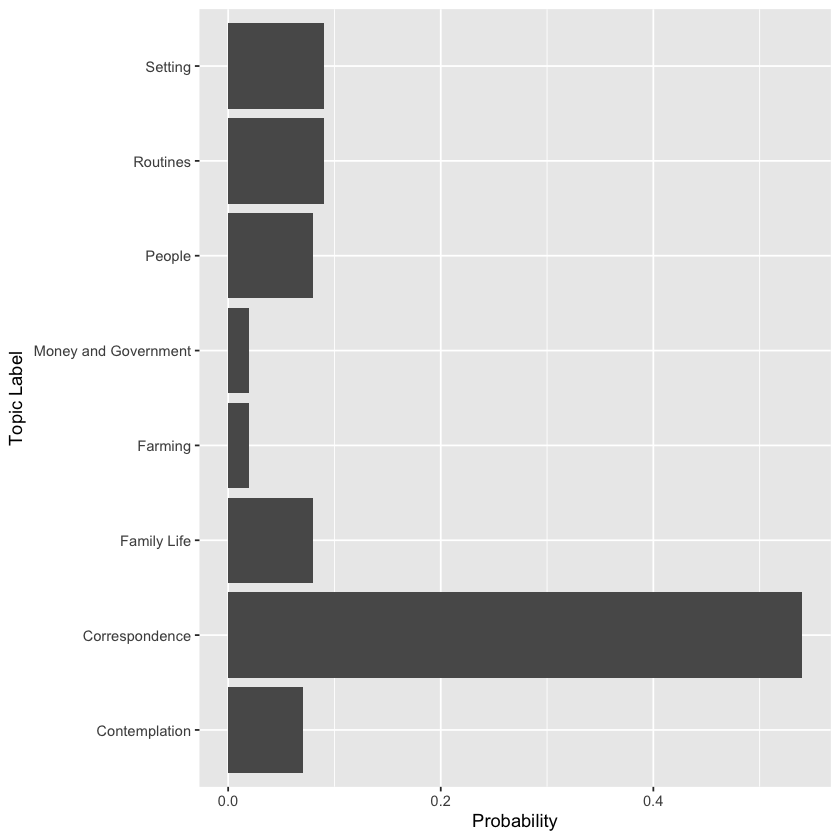

In [398]:
topicVis <- as.data.frame(f3mVis[1,])
colnames(topicVis) <- c("Probability")
rownames(topicVis) <- c("Correspondence", "Money and Government", "People", "Contemplation", "Setting", "Farming", "Routines", "Family Life")
topicVis

round(sum(topicVis$Probability), digits=0)

# Barplot
p  <- ggplot(topicVis, aes(x=rownames(topicVis), y=Probability)) + 
  geom_bar(stat = "identity") +
  coord_flip() + xlab("Topic Label")
p

In [399]:
ggsave("20240617_PhD_LtrTop02.png")

Saving 7 x 7 in image


In [380]:
get_prior(data = df2, 
          family = categorical(link = logit, refcat = "04 Correspondence"),
          topicLabel ~ 1 + (1 | docauthorid))

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,mu01Weather,,,,default
"student_t(3, 0, 2.5)",sd,,,,mu01Weather,,0,,default
,sd,,docauthorid,,mu01Weather,,,,default
,sd,Intercept,docauthorid,,mu01Weather,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu02Money,,,,default
"student_t(3, 0, 2.5)",sd,,,,mu02Money,,0,,default
,sd,,docauthorid,,mu02Money,,,,default
,sd,Intercept,docauthorid,,mu02Money,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu03Farming,,,,default


In [381]:
f4m <- brm(data = df2, 
      family = categorical(link = logit, refcat = "04 Correspondence"),
      topicLabel ~ 1 + (1 | docauthorid),
      prior = c(prior(normal(0, 2), class = Intercept, dpar = mu01Weather),
                prior(normal(0, 2), class = Intercept, dpar = mu02Money),
                prior(normal(0, 2), class = Intercept, dpar = mu03Farming),
                prior(normal(0, 2), class = Intercept, dpar = mu05People),
                prior(normal(0, 2), class = Intercept, dpar = mu06Setting),
                prior(normal(0, 2), class = Intercept, dpar = mu07Contemplation),
                prior(normal(0, 2), class = Intercept, dpar = mu08FamilyLife),
                prior(normal(0, 2), class = Intercept, dpar = mu09Travel),
                prior(normal(0, 2), class = Intercept, dpar = mu10Difficulty),
                prior(normal(0, 2), class = Intercept, dpar = mu11Government)),
      iter = 2000, warmup = 1000, cores = 4, chains = 4, seed=4)

# Using the default priors for all others.

Compiling Stan program...

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Start sampling

Found more than one c

In [384]:
print(f4m)

 Family: categorical 
  Links: mu01Weather = logit; mu02Money = logit; mu03Farming = logit; mu05People = logit; mu06Setting = logit; mu07Contemplation = logit; mu08FamilyLife = logit; mu09Travel = logit; mu10Difficulty = logit; mu11Government = logit 
Formula: topicLabel ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
                                Estimate Est.Error l-95% CI u-95% CI Rhat
sd(mu01Weather_Intercept)           1.37      0.30     0.86     2.03 1.01
sd(mu02Money_Intercept)             2.51      0.34     1.91     3.25 1.00
sd(mu03Farming_Intercept)           2.92      0.39     2.25     3.77 1.00
sd(mu05People_Intercept)            2.65      0.36     2.02     3.44 1.01
sd(mu06Setting_Intercept)           2.03      0.38     1.39     2.87 1.00
sd(mu07Contemplation_Intercept)     2.05

In [385]:
f4mVis <- fitted(f4m)[1, , ] %>%  round(digits = 2)

,Probability
,<dbl>
Weather,0.08
Money,0.02
Farming,0.02
Correspondence,0.60
People,0.02
Setting,0.02
Contemplation,0.01
Family Life,0.17
Travel,0.02


[1] 1

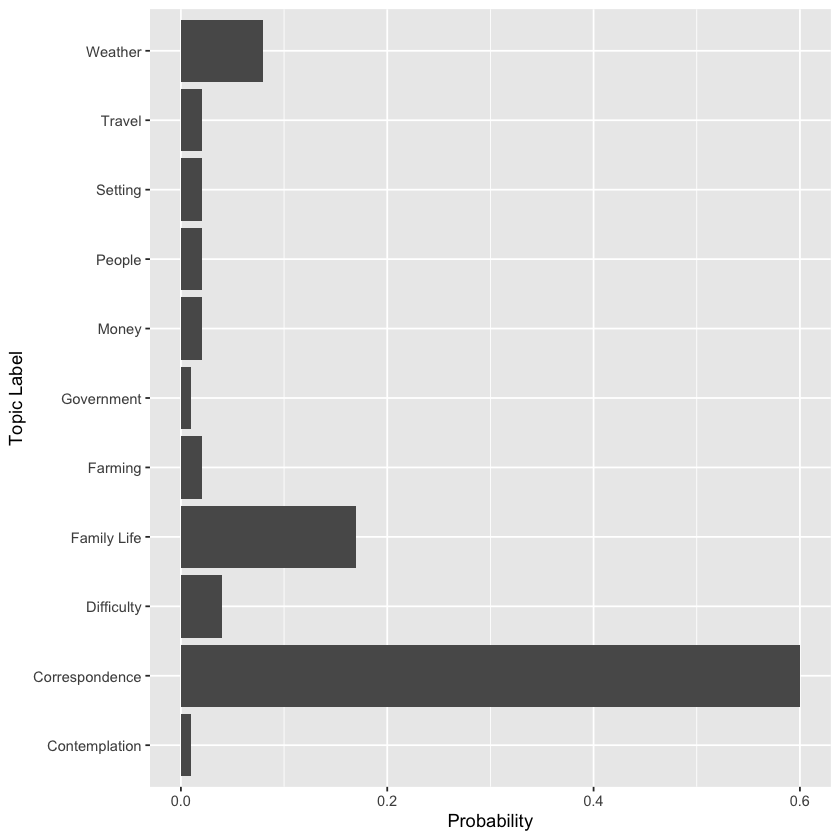

In [400]:
topicVis <- as.data.frame(f4mVis[1,])
colnames(topicVis) <- c("Probability")
rownames(topicVis) <- c("Weather", "Money", "Farming", "Correspondence", "People", "Setting", "Contemplation", "Family Life", "Travel", "Difficulty", "Government")
topicVis

round(sum(topicVis$Probability), digits=0)

# Barplot
p  <- ggplot(topicVis, aes(x=rownames(topicVis), y=Probability)) + 
  geom_bar(stat = "identity") +
  coord_flip() + xlab("Topic Label")
p

In [401]:
ggsave("20240617_PhD_LtrChkTop02.png")

Saving 7 x 7 in image


## Socials

$$socialRates_{ik} \sim Norm(\mu_{ik}, \sigma)$$
$$\mu_{ik} = \alpha_k$$
$$\alpha_k \sim Norm(\gamma, \eta)$$
$$\sigma \sim Unif(0,10)$$
$$\gamma \sim Norm(0, 1)$$
$$\eta \sim Unif(0, 10)$$

In [406]:
get_prior(data = df1, 
          family = gaussian,
          indsRate ~ 1)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,,,,,default
"student_t(3, 0, 2.5)",sigma,,,,,,0,,default


In [402]:
# Used this to verify that brm giving the same result as quap for single level model. All good.
f5s <- brm(data=df1,
           family=gaussian,
           indsRate ~ 1,
           prior=c(prior("normal(0,1)",class=Intercept),
                   prior("uniform(0,10)",class=sigma, ub = 10)),
           iter=2000,warmup = 1000,chains=4,cores=4, 
           seed = 4)

print(f5s)

Compiling Stan program...

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Start sampling

Found more than one c

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: indsRate ~ 1 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.04      0.00     0.04     0.04 1.00     4338     3145

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.02      0.00     0.02     0.02 1.00     1098     1163

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [412]:
print(f5s, digits=4)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: indsRate ~ 1 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI   Rhat Bulk_ESS Tail_ESS
Intercept   0.0380    0.0009   0.0363   0.0397 1.0009     4338     3145

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI   Rhat Bulk_ESS Tail_ESS
sigma   0.0231    0.0006   0.0220   0.0244 1.0022     1098     1163

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


This is very close to the output from the quap function in rethinking. All good.

In [15]:
f5m <- brm(
    formula= indsRate ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,1)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240617_PhD_LtrSocI_02"
)

print(f5m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: indsRate ~ 1 + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.02      0.00     0.02     0.03 1.00     1091     2173

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.03      0.00     0.03     0.03 1.00     1396     2023

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.02      0.00     0.01     0.02 1.00     3401     2871

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at converg

In [16]:
f6m <- brm(
    formula= fppAllRate ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,1)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240617_PhD_LtrSocF_02"
)

print(f6m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: fppAllRate ~ 1 + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.02      0.00     0.01     0.02 1.00     1212     2246

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.03      0.00     0.03     0.04 1.00     1492     2142

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.01      0.00     0.01     0.01 1.00     3623     2809

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at conve

In [17]:
f7m <- brm(
    formula= mentsRate ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,1)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240617_PhD_LtrChkSocM_02"
)

print(f7m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: mentsRate ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.01      0.00     0.01     0.02 1.00      955     1964

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.02      0.00     0.02     0.02 1.00      980     1737

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.01      0.00     0.01     0.01 1.00     7110     2999

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at conve

In [18]:
f8m <- brm(
    formula= fppAllRate ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,1)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240617_PhD_LtrChkSocF_02"
)

print(f8m)

Compiling Stan program...

Start sampling

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: fppAllRate ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.02      0.00     0.02     0.02 1.01      362      879

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.03      0.00     0.03     0.04 1.01      460      817

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.02      0.00     0.02     0.02 1.00     5021     2934

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at conv

In [19]:
print(f5m, digits=4)
print(f6m, digits=4)
print(f7m, digits=4)
print(f8m, digits=4)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: indsRate ~ 1 + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI   Rhat Bulk_ESS Tail_ESS
sd(Intercept)   0.0218    0.0017   0.0186   0.0252 1.0044     1091     2173

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI   Rhat Bulk_ESS Tail_ESS
Intercept   0.0309    0.0019   0.0272   0.0347 1.0004     1396     2023

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI   Rhat Bulk_ESS Tail_ESS
sigma   0.0157    0.0005   0.0147   0.0167 1.0001     3401     2871

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains